<a href="https://colab.research.google.com/github/PrasoonPratham/Kaggle/blob/main/FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Using the Kaggle API to fetch the dataset for this competition

!pip install kaggle
api_token = {"username":"prathamsbot","key":"31df8eaf691eda54bf2ca336d9d59eb6"}
import json
import zipfile
import os
!mkdir /root/.kaggle
!echo '{"username":"USERNAME","key":"API_KEY"}' > /root/.kaggle/kaggle.json
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d zalando-research/fashionmnist

 83% 57.0M/68.8M [00:00<00:00, 122MB/s] 
100% 68.8M/68.8M [00:00<00:00, 155MB/s]


In [ ]:
zip_ref = zipfile.ZipFile('/content/fashionmnist.zip', 'r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
import pandas as pd
test_data = pd.read_csv('/content/fashion-mnist_test.csv')
train_data = pd.read_csv('/content/fashion-mnist_train.csv')

In [ ]:
#Importing numpy and tensorflow
import numpy as np
import tensorflow as tf

In [ ]:
#Training labels set
Y_train = train_data["label"]
Y_test = test_data["label"]
# Drop 'label' column
X_train = train_data.drop(labels = ["label"],axis = 1) 
X_test = test_data.drop(labels = ["label"],axis = 1)

In [ ]:
#Normalizing data for better performance
X_train = X_train/255.0
X_test = X_test/255.0

#Reshaping Data
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
#Model architecture
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),                      
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])


In [ ]:
train_datagen = ImageDataGenerator( 
        rotation_range=6,        # randomly rotate between 0-rotation_range angle
        width_shift_range=0.4,    # randomly shift horizontally by this much
        height_shift_range=0.4,   # randomly shift vertically by this much
        shear_range=0.1,          # randomly shear by this much
        zoom_range=0.1,           # randomly zoom (80% - 120%)
        horizontal_flip=True,
        fill_mode='nearest'       # fill any pixels lost in xform with nearest
    )

val_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

In [ ]:
from tensorflow.python import keras
keras.backend.clear_session() 

In [ ]:
# batch_size = 32
# num_train_batches = len(X_train) // batch_size
# num_train_batches += (0 if len(X_train) % batch_size == 0 else 1)     
# num_val_batches = len(X_test) // batch_size
# num_val_batches += (0 if len(X_test) % batch_size == 0 else 1)     
# num_test_batches = len(X_test) // batch_size
# num_test_batches += (0 if len(Y_test) % batch_size == 0 else 1) 

In [ ]:
    # train_generator = train_datagen.flow(X_train, Y_train, 
    #                                      batch_size=batch_size,
    #                                      seed=123)
    # val_generator = train_datagen.flow(X_test, Y_test, 
    #                                      batch_size=batch_size,
    #                                      seed=123)
    # test_generator = test_datagen.flow(X_test, Y_test, 
    #                                    batch_size=batch_size,
    #                                    seed=123)

    # history = model.fit_generator(train_generator,
    #                               steps_per_epoch = num_train_batches, 
    #                               epochs = 100,
    #                               validation_data = val_generator,
    #                               validation_steps = num_val_batches)

In [ ]:
print("Fit model on training data")
history = model.fit(
    X_train,
    Y_train,
    batch_size=4096,
    epochs=65,
    validation_data=(X_test, Y_test),
)

Fit model on training data
Epoch 1/65
15/15 [==============================] - 3s 186ms/step - loss: 1.9453 - accuracy: 0.2761 - val_loss: 1.3526 - val_accuracy: 0.4803
Epoch 2/65
15/15 [==============================] - 3s 174ms/step - loss: 1.2641 - accuracy: 0.5016 - val_loss: 1.0626 - val_accuracy: 0.6192
Epoch 3/65
15/15 [==============================] - 3s 175ms/step - loss: 1.0736 - accuracy: 0.5850 - val_loss: 0.9204 - val_accuracy: 0.6558
Epoch 4/65
15/15 [==============================] - 3s 175ms/step - loss: 0.9576 - accuracy: 0.6360 - val_loss: 0.8232 - val_accuracy: 0.6952
Epoch 5/65
15/15 [==============================] - 3s 176ms/step - loss: 0.8804 - accuracy: 0.6651 - val_loss: 0.7607 - val_accuracy: 0.7166
Epoch 6/65
15/15 [==============================] - 3s 175ms/step - loss: 0.7957 - accuracy: 0.7030 - val_loss: 0.7449 - val_accuracy: 0.7358
Epoch 7/65
15/15 [==============================] - 3s 175ms/step - loss: 0.7560 - accuracy: 0.7171 - val_loss: 0.6766 - 

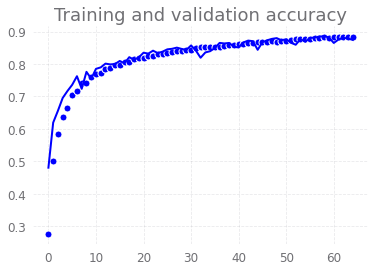

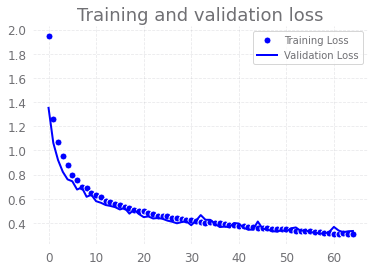

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
predicted_classes = model.predict_classes(X_test)
submissions=pd.DataFrame({"ImageId": list(range(1,len(predicted_classes)+1)),
                         "Label": predicted_classes})
submissions.to_csv("submission.csv", index=False, header=True)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
